In [40]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
#正常显示画图时出现的中文
from pylab import mpl
#这里使用微软雅黑字体
mpl.rcParams['font.sans-serif']=['SimHei']
#画图时显示负号
mpl.rcParams['axes.unicode_minus']=False
import seaborn as sns  #画图用的
import tushare as ts
#Jupyter Notebook特有的magic命令
#直接在行内显示图形
%matplotlib inline 

使用tushare包的get_k_data()函数来获取股票交易数据

In [41]:
sh=ts.get_k_data(code='sh',ktype='D',
  autype='qfq', start='1990-12-20')
#code:股票代码，个股主要使用代码，如‘600000’
#ktype:'D':日数据；‘m’：月数据，‘Y’:年数据
#autype:复权选择，默认‘qfq’前复权
#start：起始时间
#end：默认当前时间
#查看下数据前5行
sh.head(5)

,date,open,close,high,low,volume,code
1,1990-12-20,113.1,113.5,113.5,112.85,1990.0,sh
2,1990-12-21,113.5,113.5,113.5,113.40,1190.0,sh
3,1990-12-24,113.5,114.0,114.0,113.30,8070.0,sh
4,1990-12-25,114.0,114.1,114.2,114.00,2780.0,sh
5,1990-12-26,114.4,114.3,114.4,114.20,310.0,sh


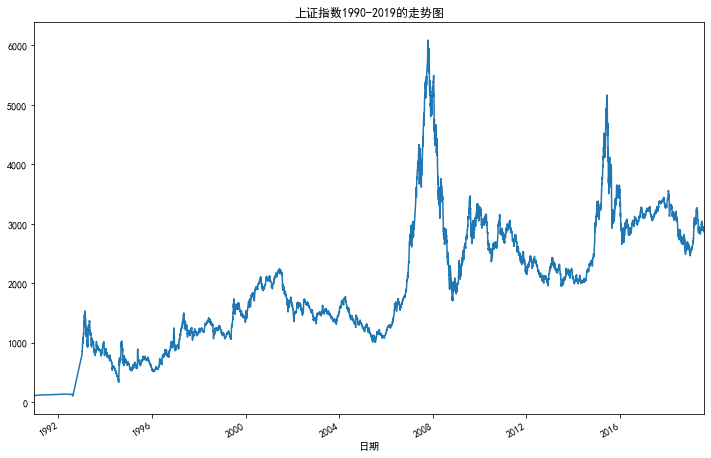

In [42]:
sh.index = pd.to_datetime(sh['date'])
sh['close'].plot(figsize=(12,8))
plt.title('上证指数1990-2019的走势图')
plt.xlabel('日期')
plt.show(
)

上面的指数走势图还是可以清晰看出，股指分别在2007年和2015年有两波大牛市，然后又从高峰跌入谷底，目前处于下跌通道。真是辛辛苦苦28年，一夜回到解放前

In [43]:
#pandas的describe()函数提供了数据的描述性统计
#count:数据样本，mean:均值，std:标准差
sh.describe().round(2)

,open,close,high,low,volume
count,6825.00,6825.00,6825.00,6825.00,6.825000e+03
mean,1960.20,1961.48,1978.80,1940.25,7.450167e+07
std,1074.29,1075.67,1085.41,1061.84,1.054603e+08
min,105.50,105.50,105.50,105.50,1.000000e+01
25%,1187.54,1186.61,1195.74,1173.54,5.292410e+06
50%,1837.27,1837.99,1852.90,1815.99,2.406210e+07
75%,2781.60,2787.26,2813.27,2753.84,1.151401e+08
max,6057.43,6092.06,6124.04,6040.71,8.571328e+08


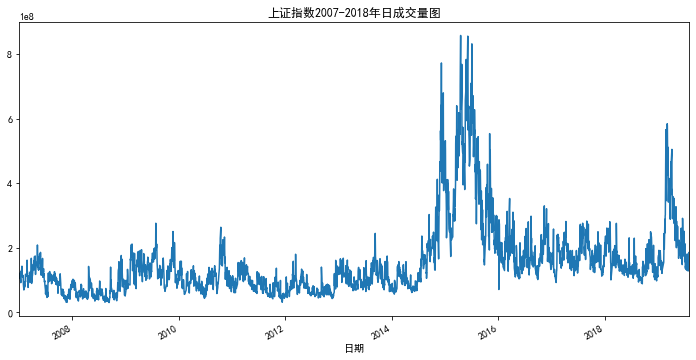

In [44]:
#再查看下每日成交量 
#2006年市场容量小，交易量比较小，我们从2007年开始看
sh.loc["2007-01-01":]["volume"].plot(figsize=(12,6))
plt.title('上证指数2007-2018年日成交量图')
plt.xlabel('日期')
plt.show()

pandas中时间窗函数rolling的使用

```
>>> df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
>>> df
     B
0  0.0
1  1.0
2  2.0
3  NaN
4  4.0

窗口长度为2的滚动和，使用“三角形”

窗口类型。

>>> df.rolling(2, win_type='triang').sum()
     B
0  NaN
1  1.0
2  2.5
3  NaN
4  NaN

Rolling sum with a window length of 2, min_periods defaults
to the window length.

>>> df.rolling(2).sum()
     B
0  NaN
1  1.0
2  3.0
3  NaN
4  NaN

Same as above, but explicitly set the min_periods

>>> df.rolling(2, min_periods=1).sum()
     B
0  0.0
1  1.0
2  3.0
3  2.0
4  4.0

A ragged (meaning not-a-regular frequency), time-indexed DataFrame

>>> df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
...                   index = [pd.Timestamp('20130101 09:00:00'),
...                            pd.Timestamp('20130101 09:00:02'),
...                            pd.Timestamp('20130101 09:00:03'),
...                            pd.Timestamp('20130101 09:00:05'),
...                            pd.Timestamp('20130101 09:00:06')])

>>> df
                       B
2013-01-01 09:00:00  0.0
2013-01-01 09:00:02  1.0
2013-01-01 09:00:03  2.0
2013-01-01 09:00:05  NaN
2013-01-01 09:00:06  4.0

Contrasting to an integer rolling window, this will roll a variable
length window corresponding to the time period.
The default for min_periods is 1.

>>> df.rolling('2s').sum()
                       B
2013-01-01 09:00:00  0.0
2013-01-01 09:00:02  1.0
2013-01-01 09:00:03  3.0
2013-01-01 09:00:05  NaN
2013-01-01 09:00:06  4.0
```

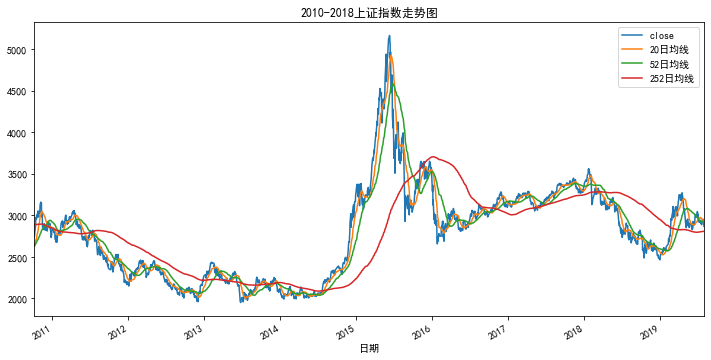

In [49]:
#这里的平均线是通过自定义函数，手动设置20,52,252日均线
#移动平均线：
ma_day = [20,52,252]

for ma in ma_day:
    column_name = "%s日均线" %(str(ma))
    sh[column_name] =sh["close"].rolling(ma).mean()
#sh.tail(3)
#画出2010年以来收盘价和均线图
sh.loc['2010-10-8':][["close",
"20日均线","52日均线","252日均线"]].plot(figsize=(12,6))
plt.title('2010-2018上证指数走势图')
plt.xlabel('日期')
plt.show()

In [46]:
sh.tail(3)

,date,open,close,high,low,volume,code,column_name
date,,,,,,,,
2019-07-31,2019-07-31,2944.40,2932.51,2944.40,2926.49,141052348.0,sh,2806.831746
2019-08-01,2019-08-01,2920.85,2908.77,2927.34,2901.75,142389813.0,sh,2807.372302
2019-08-02,2019-08-02,2861.33,2867.84,2872.47,2851.44,184888443.0,sh,2807.525357


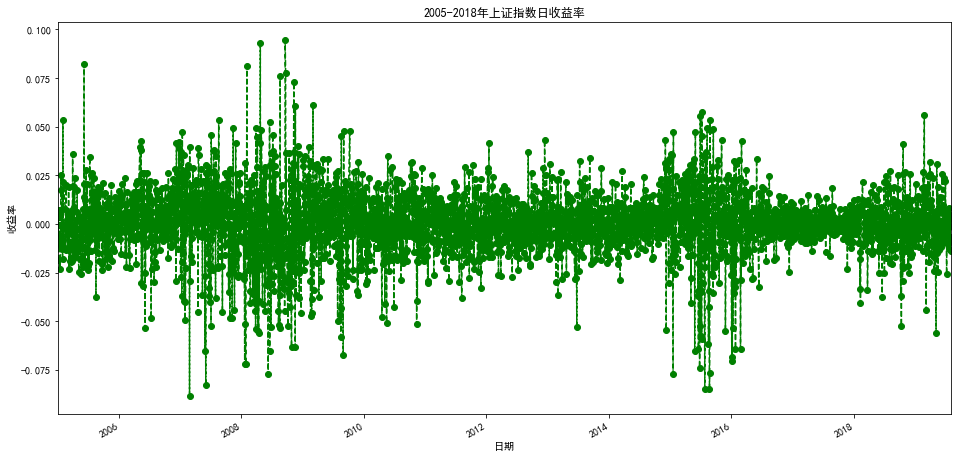

In [57]:
sh['日收益率'] =sh['close'].pct_change()
sh['日收益率'].loc['2005-01-01':].plot(figsize =(16,8),linestyle='--',marker='o',color='g')
plt.xlabel('日期')
plt.ylabel('收益率')
plt.title('2005-2018年上证指数日收益率')
plt.show()

In [58]:
# 分析多只股票（指数）
#分析下常见的几个股票指数
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指':'zxb','创业板':'cyb'}
stock_index=pd.DataFrame()
for stock in stocks.values():
    stock_index[stock]=ts.get_k_data(stock,ktype='D', 
autype='qfq', start='2005-01-01')['close']
#stock_index.head()
#计算这些股票指数每日涨跌幅
tech_rets = stock_index.pct_change()[1:]
#tech_rets.head()
#收益率描述性统计
tech_rets.describe()
#结果不在此报告
#均值其实都大于0
tech_rets.mean()*100 #转换为%

sh       0.036992
sz       0.048654
hs300    0.052197
sz50     0.050215
zxb      0.013878
cyb      0.025258
dtype: float64

In [61]:
tech_rets.describe()

,sh,sz,hs300,sz50,zxb,cyb
count,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000
mean,0.000370,0.000487,0.000522,0.000502,0.000139,0.000253
std,0.016329,0.018647,0.017289,0.017511,0.016960,0.015887
min,-0.088407,-0.092898,-0.092400,-0.094705,-0.084107,-0.089097
25%,-0.006659,-0.008441,-0.007050,-0.007470,-0.006174,-0.003387
50%,0.000757,0.000591,0.000663,0.000378,0.000000,0.000000
75%,0.008230,0.010084,0.008714,0.008736,0.007908,0.004652
max,0.094549,0.095942,0.093418,0.096731,0.097128,0.071586


In [60]:
tech_rets.head()

,sh,sz,hs300,sz50,zxb,cyb
1,0.007379,0.009070,-0.008002,0.005272,0.004482,0.001279
2,-0.009992,-0.007904,-0.016797,-0.010741,-0.025450,0.029334
3,0.004292,0.002265,0.022683,0.001362,0.009146,0.040661
4,0.006146,0.008941,-0.013917,0.011377,-0.044799,-0.002164
5,0.004040,0.002233,-0.013060,0.005846,0.014144,0.009998


F:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


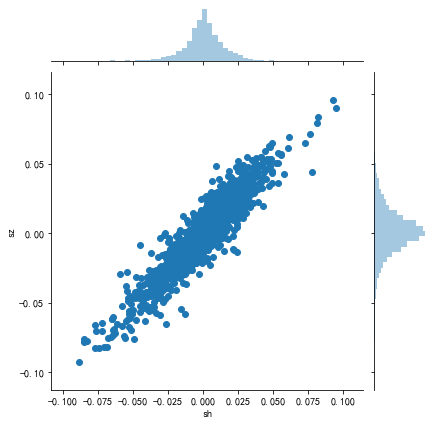

In [63]:
import seaborn as sns
sns.jointplot('sh','sz',data=tech_rets)

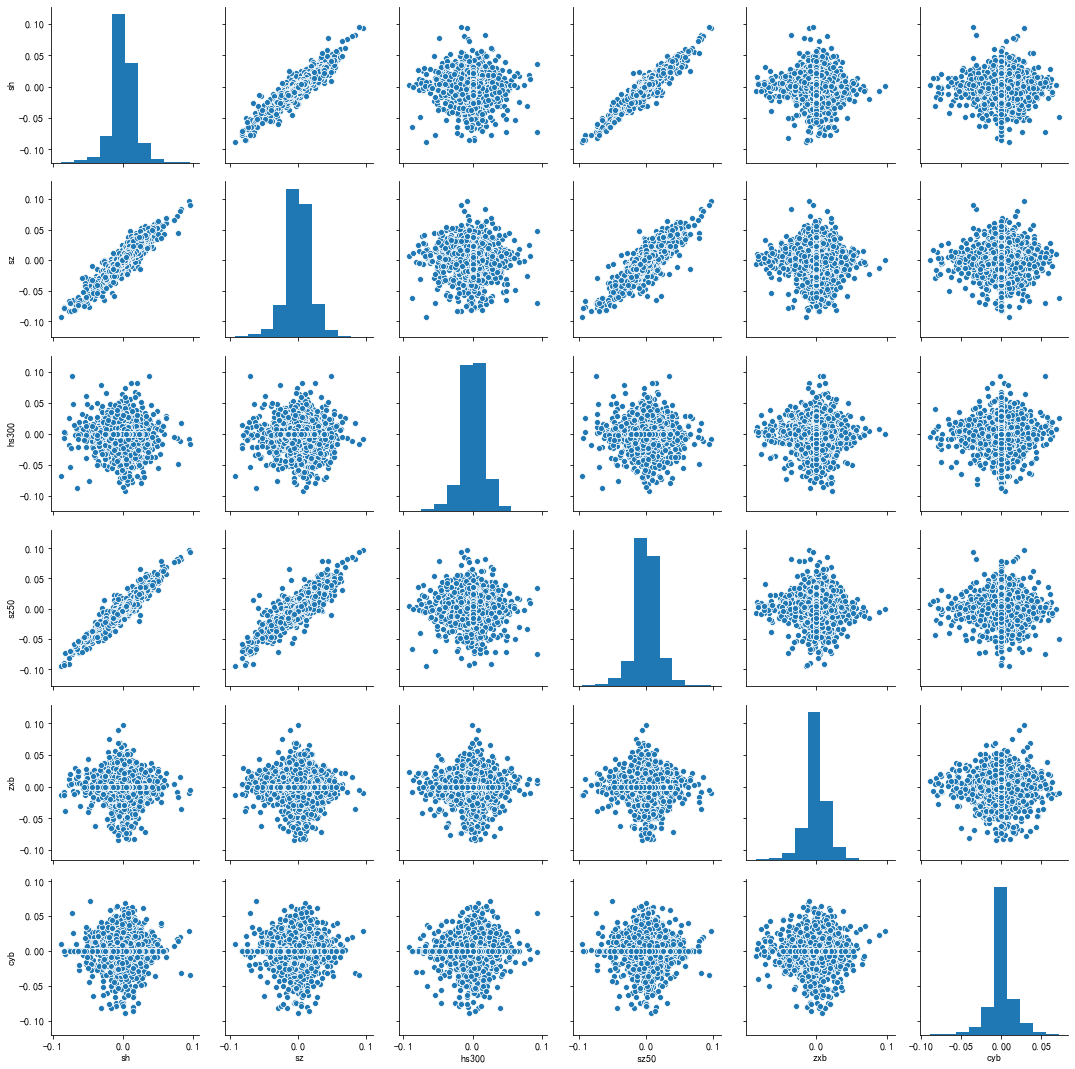

In [65]:
sns.pairplot(tech_rets.dropna())

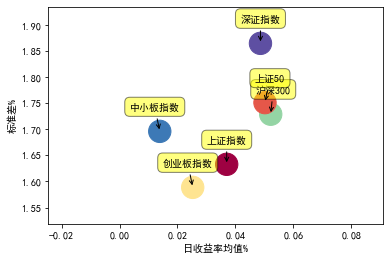

In [66]:
# 使用均值和标准分别刻画股票（指数）的收益率和波动率，对比分析不同股票（指数）的收益-风险情况。
#构建一个计算股票收益率和标准差的函数
#默认起始时间为'2005-01-01'
def return_risk(stocks,startdate='2005-01-01'):
    close=pd.DataFrame()
    for stock in stocks.values():
        close[stock]=ts.get_k_data(stock,ktype='D', 
     autype='qfq', start=startdate)['close']
    tech_rets = close.pct_change()[1:]
    rets = tech_rets.dropna()
    ret_mean=rets.mean()*100
    ret_std=rets.std()*100
    return ret_mean,ret_std

#画图函数
def plot_return_risk():
    ret,vol=return_risk(stocks)
    color=np.array([ 0.18, 0.96, 0.75, 0.3, 0.9,0.5])
    plt.scatter(ret, vol, marker = 'o', 
    c=color,s = 500,cmap=plt.get_cmap('Spectral'))
    plt.xlabel("日收益率均值%")     
    plt.ylabel("标准差%")
    for label,x,y in zip(stocks.keys(),ret,vol):
        plt.annotate(label,xy = (x,y),xytext = (20,20),
            textcoords = "offset points",
             ha = "right",va = "bottom",
            bbox = dict(boxstyle = 'round,pad=0.5',
            fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = "->",
                    connectionstyle = "arc3,rad=0"))
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指数':'zxb','创业板指数':'cyb'}
plot_return_risk()

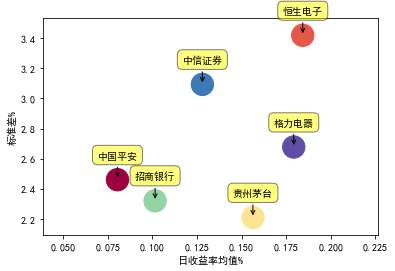

In [67]:
stocks={'中国平安':'601318','格力电器':'000651',
        '招商银行':'600036','恒生电子':'600570',
        '中信证券':'600030','贵州茅台':'600519'}
startdate='2018-01-01'
plot_return_risk()